In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../modules/')
from DataHandler import *
from Helper import *
import numpy as np
import scienceplots
import scipy.optimize as opt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## LVDT analysis

In [6]:
LVDT_alucld_od_08_data = get_data('LVDT_alucld_od_08', data=LVDT_data_files)
LVDT_alucld_od_10_data = get_data('LVDT_alucld_od_10', data=LVDT_data_files)
LVDT_alucld_od_12_data = get_data('LVDT_alucld_od_12', data=LVDT_data_files)
LVDT_alucld_od_14_data = get_data('LVDT_alucld_od_14', data=LVDT_data_files)
LVDT_alucld_od_08_magcore_data = get_data('LVDT_alucld_od08_magcore_d04_l06', data=LVDT_data_files)
LVDT_alucld_od_10_magcore_data = get_data('LVDT_alucld_od10_magcore_d04_l06', data=LVDT_data_files)
LVDT_alucld_od_12_magcore_data = get_data('LVDT_alucld_od12_magcore_d04_l06', data=LVDT_data_files)
LVDT_alucld_od_14_magcore_data = get_data('LVDT_alucld_od14_magcore_d04_l06', data=LVDT_data_files)

LVDT_combi_data = {'aircoil_default': get_data('LVDT_aircoil', 'combi_default', data=LVDT_data_files),
                   'alucld_d08d06': get_data('LVDT_alucld_od08_magcore_d04_l06', 'alucld_d08d06', data=LVDT_data_files),
                   'alucld_d10d08': get_data('LVDT_alucld_od10_magcore_d04_l06', 'alucld_d10d08', data=LVDT_data_files),
                   'alucld_d12d10': get_data('LVDT_alucld_od12_magcore_d04_l06', 'alucld_d12d10', data=LVDT_data_files),
                   'alucld_d14d12': get_data('LVDT_alucld_od14_magcore_d04_l06', 'alucld_d14d12', data=LVDT_data_files)}

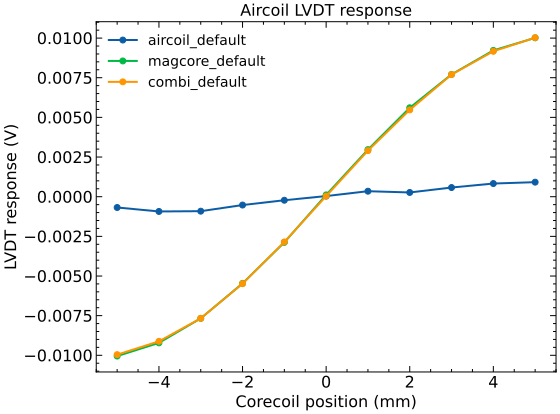

In [8]:
aircoil_data = get_data('LVDT_aircoil', data=LVDT_data_files)
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(8, 6))
for key in aircoil_data:
    data = aircoil_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], 'o-', label=key)
plt.title('Aircoil LVDT response')
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.legend(fontsize = 14)
plt.tight_layout()

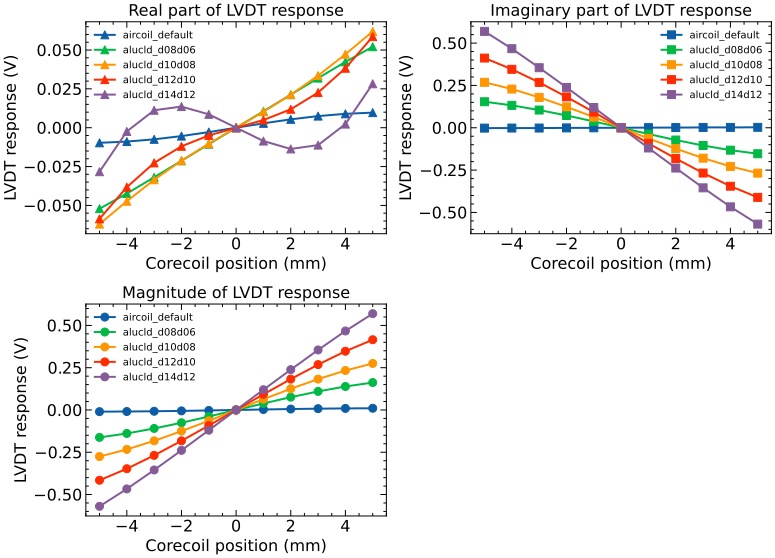

In [9]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2, 2, 1)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_real'], marker = '^', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Real part of LVDT response')

plt.subplot(2, 2, 2)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_imag'], marker = 's', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Imaginary part of LVDT response')

plt.subplot(2, 2, 3)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.tight_layout()

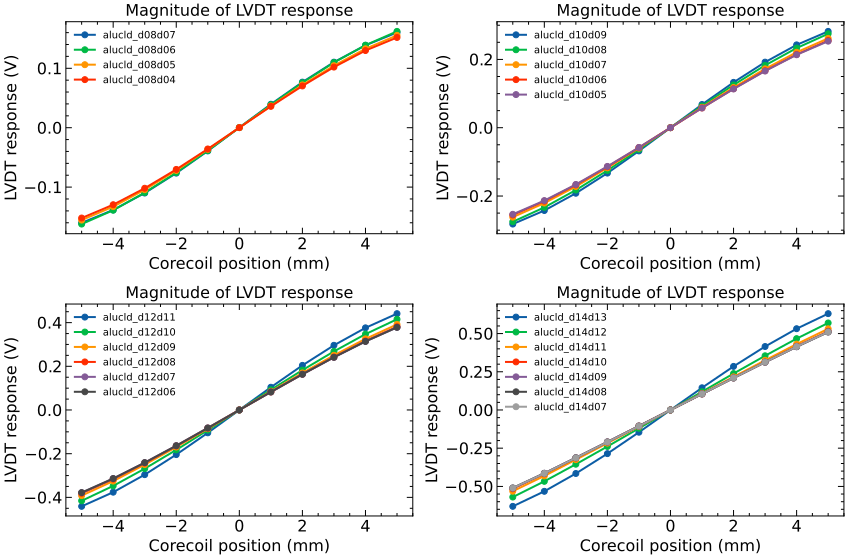

In [10]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
# for key in LVDT_alucld_od_08_data:
#     data = LVDT_alucld_od_08_data[key]
#     position = data['CC_pos']
#     plt.plot(position, data['MC_volt_abs'], marker = '|', markersize = 10, label=key+ 'no magcore')
for key in LVDT_alucld_od_08_magcore_data:
    data = LVDT_alucld_od_08_magcore_data[key]
    position = data['CC_pos']
    plt.plot(position, data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.subplot(2,2,2)
# for key in LVDT_alucld_od_10_data:
#     data = LVDT_alucld_od_10_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od_10_magcore_data:
    data = LVDT_alucld_od_10_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.subplot(2,2,3)
# for key in LVDT_alucld_od_12_data:
#     data = LVDT_alucld_od_12_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od_12_magcore_data:
    data = LVDT_alucld_od_12_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.subplot(2,2,4)
# for key in LVDT_alucld_od_14_data:
#     data = LVDT_alucld_od_14_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od_14_magcore_data:
    data = LVDT_alucld_od_14_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.tight_layout()


Optimal parameters: [ 2.98652267e+00 -7.87691004e-04]


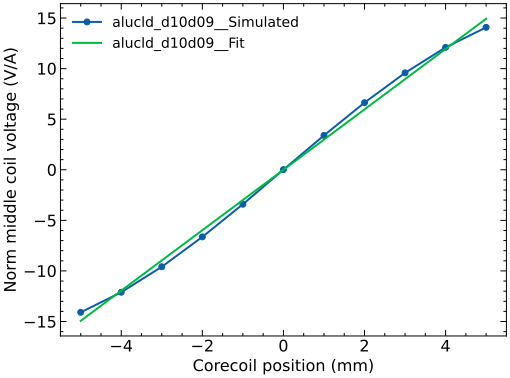

Optimal parameters: [ 2.88157295e+00 -2.56733364e-03]


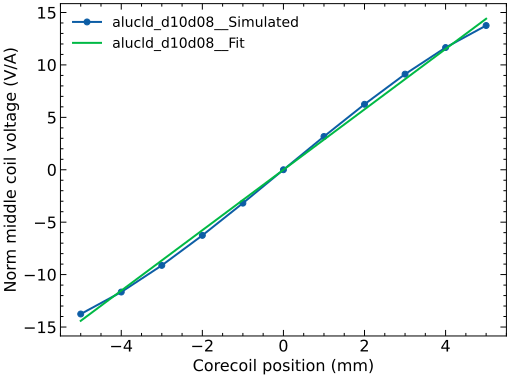

Optimal parameters: [2.72996551 0.00632095]


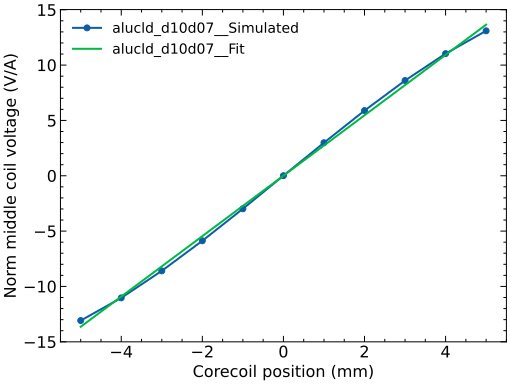

Optimal parameters: [ 2.65800533e+00 -1.97150701e-03]


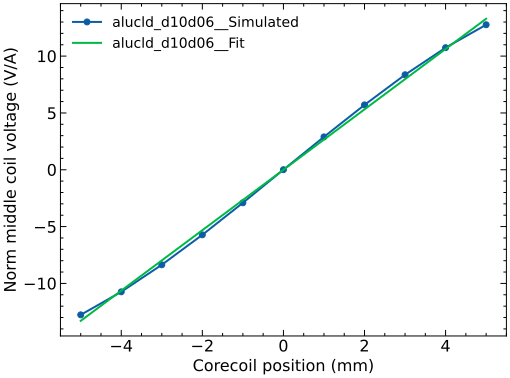

Optimal parameters: [2.63840074 0.00709054]


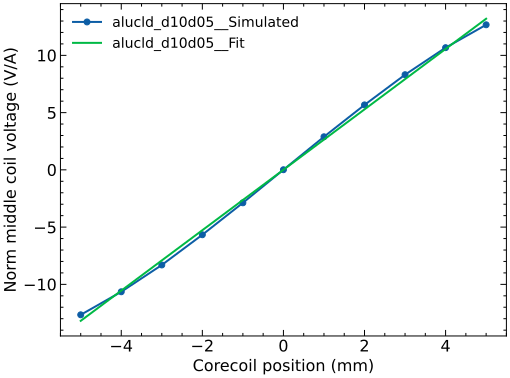

In [26]:
target = LVDT_alucld_od_10_data
for key in target:
    data  = target[key]
    norm_factor = 0.02
    Gain = 70 
    def linfunc(x, a, b):
        return a*x + b
    plt.style.use(['science','no-latex','notebook'])
    popt, pcov = opt.curve_fit(linfunc, data['CC_pos'], data['MC_volt_abs']/norm_factor)
    fitted_data = linfunc(data['CC_pos'], *popt)
    print('Optimal parameters:', popt)
    plt.figure(figsize=(8,6))
    plt.plot(data['CC_pos'], data['MC_volt_abs']/norm_factor, 'o-', label=key + '__Simulated', )
    plt.plot(data['CC_pos'], fitted_data, label=key + '__Fit')
    plt.xlabel('Corecoil position (mm)')
    plt.ylabel('Norm middle coil voltage (V/A)')
    # the response is the slope value with the unit V/mmA
    # plt.title('Fitted response of MC (Gain=70):' f'{opt_params[0]*Gain:.2f} V/mmA', fontsize = 12) 
    plt.legend(fontsize = 14)
    plt.show()

## VC analysis


In [20]:
VC_alucld_d08d07_data = get_data('VC_alucld_d08d07', data = VC_data_files)
VC_alucld_d08d06_data = get_data('VC_alucld_d08d06', data = VC_data_files)
VC_alucld_d10d09_data = get_data('VC_alucld_d10d09', data = VC_data_files)
VC_alucld_d10d08_data = get_data('VC_alucld_d10d08', data = VC_data_files)

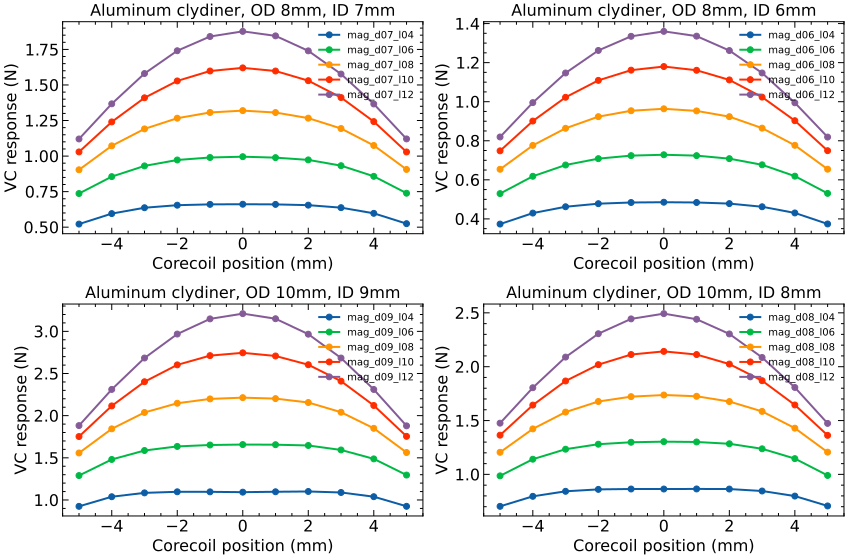

In [21]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for key in VC_alucld_d08d07_data:
    data = VC_alucld_d08d07_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 8mm, ID 7mm')

plt.subplot(2, 2, 2)
for key in VC_alucld_d08d06_data:
    data = VC_alucld_d08d06_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 8mm, ID 6mm')

plt.subplot(2, 2, 3)
for key in VC_alucld_d10d09_data:
    data = VC_alucld_d10d09_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 10mm, ID 9mm')

plt.subplot(2, 2, 4)
for key in VC_alucld_d10d08_data:
    data = VC_alucld_d10d08_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 10mm, ID 8mm')
plt.tight_layout()
